In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split#اللي بتقسم الxand y

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

#عشان اخلي الداتا بلنسد واحسن الاكيوريسي
from imblearn.over_sampling import RandomOverSampler#بيزود القليل بالاضافه

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [26]:
data=pd.read_csv(r"C:\Users\eazif allay\Desktop\ml_project\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
data.duplicated().sum()

np.int64(0)

analysis

In [31]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

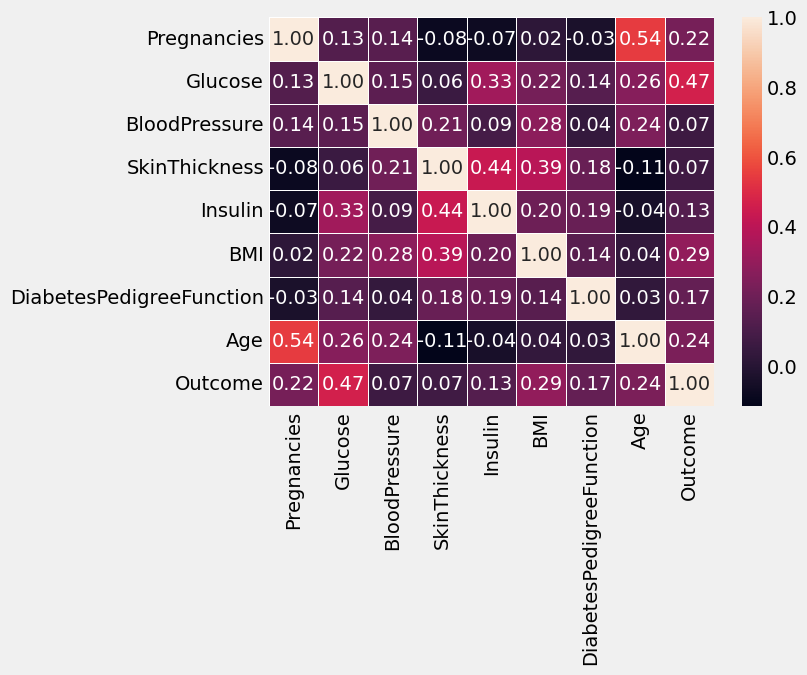

In [32]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidths='0.5')

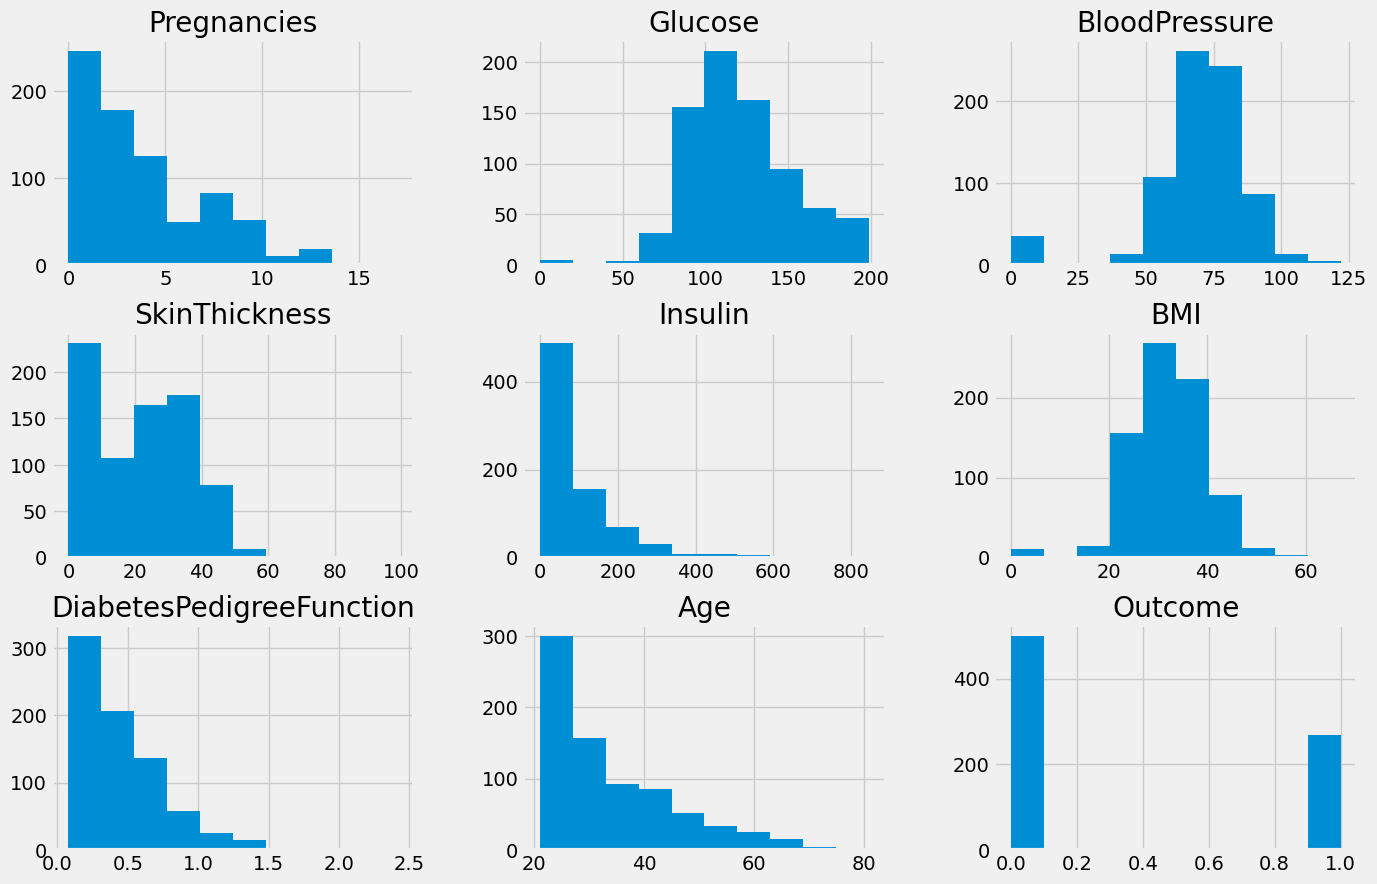

In [33]:
# Understanding the Shape and Distribution of Data to Complete the Missing Data
data.hist(bins=10,figsize=(15,10))
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

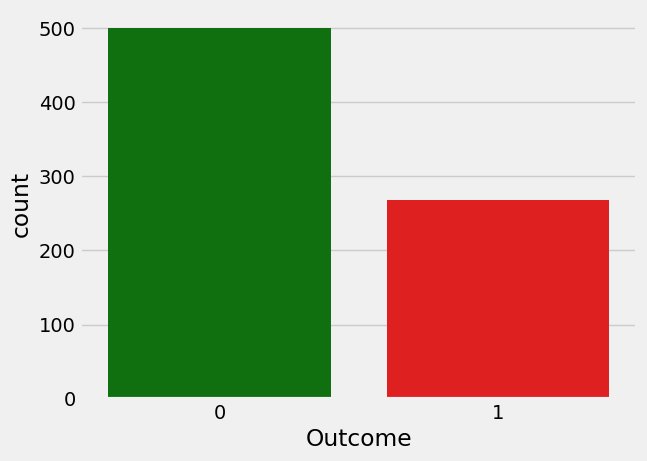

In [34]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])
#هتقولي كام واحد عنده سكر وكام واحد لا

In [35]:
#هنا عرفت ان مفيش بلانسي في الداتا عدد الكويسين اكتر فاهو معرفش يدرب فاطلع اكيورسي قليله
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape , mini.shape

((500, 9), (268, 9))

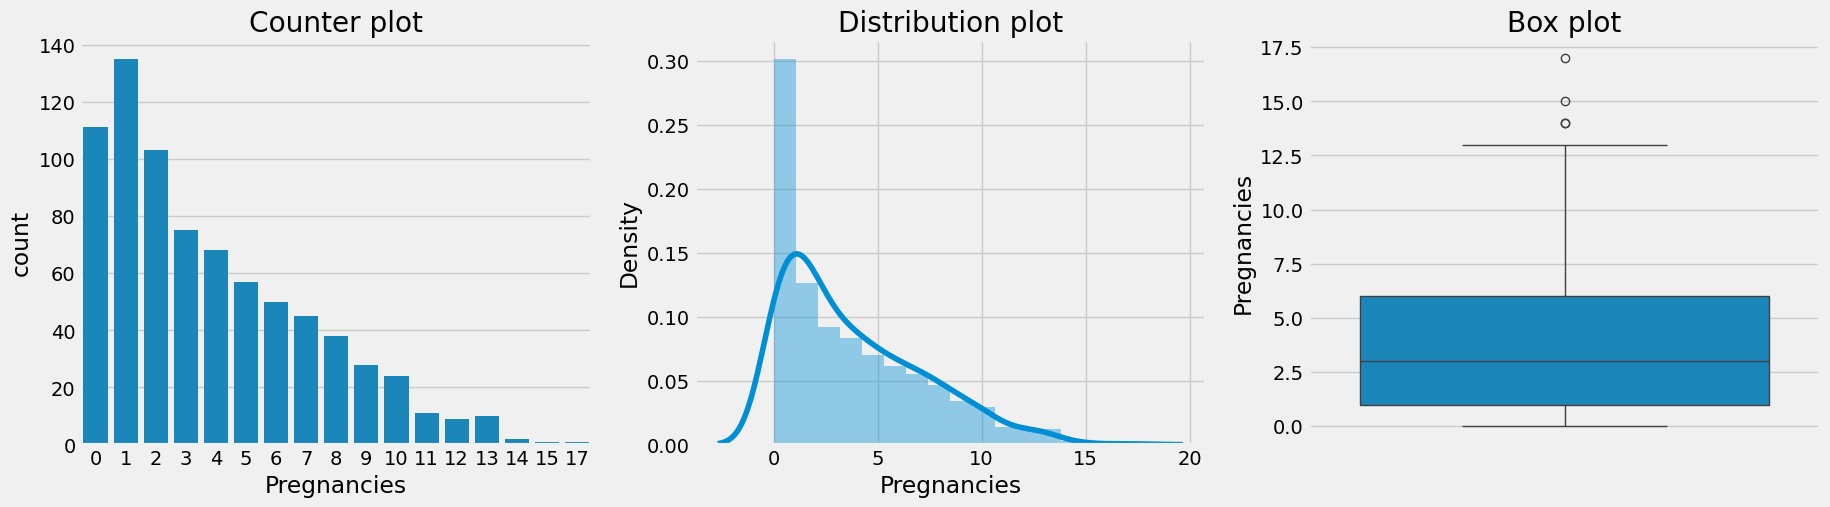

In [36]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Counter plot")
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title("Distribution plot")
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(y=data['Pregnancies'])

plt.show()

<Axes: ylabel='Age'>

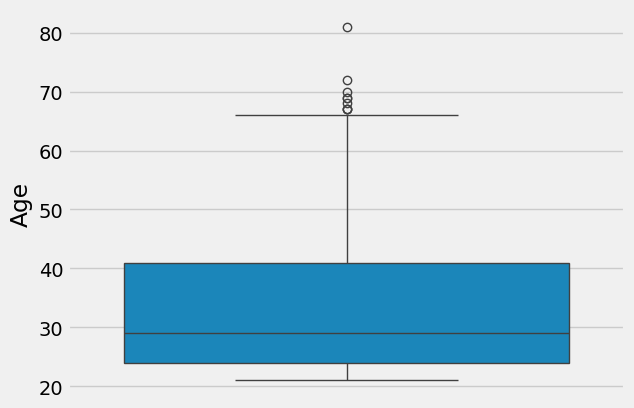

In [37]:
sns.boxplot(data.Age)

Create Moddel

In [38]:
#هنقسم رأسي
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [39]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [40]:
#هنقسم افقي 80 و 20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=41)

In [41]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [42]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    #عشان نحسب الاكيورسي والجو ده
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    #confusion_matrix(pre,y_test) بتاعت الترو والفولس
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is :',accuracy,'recall is :',recall,'f1 is :',f1)


LogisticRegression(max_iter=1000)
accuracy is : 0.7792207792207793 recall is : 0.7692307692307693 f1 is : 0.6382978723404256


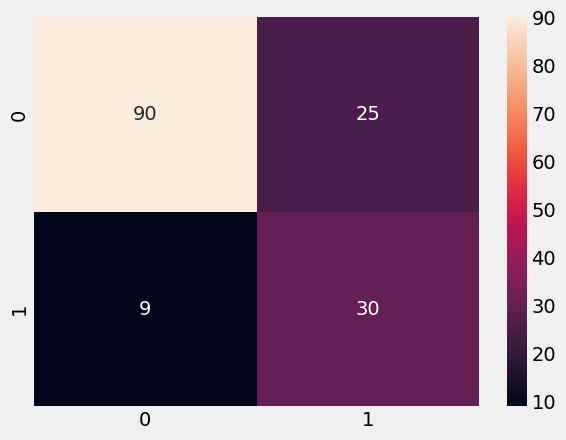

In [43]:
model1=LogisticRegression(max_iter=1000)
cal(model1)

SVC(probability=True)
accuracy is : 0.7597402597402597 recall is : 0.7368421052631579 f1 is : 0.6021505376344086


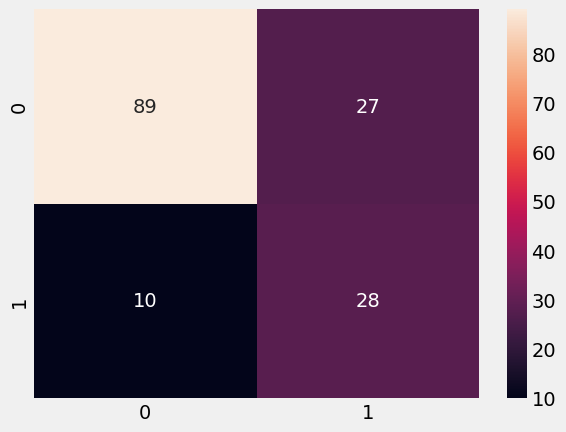

In [44]:
model2=SVC(probability=True)
cal(model2)

RandomForestClassifier(class_weight='balanced')
accuracy is : 0.7662337662337663 recall is : 0.7435897435897436 f1 is : 0.6170212765957447


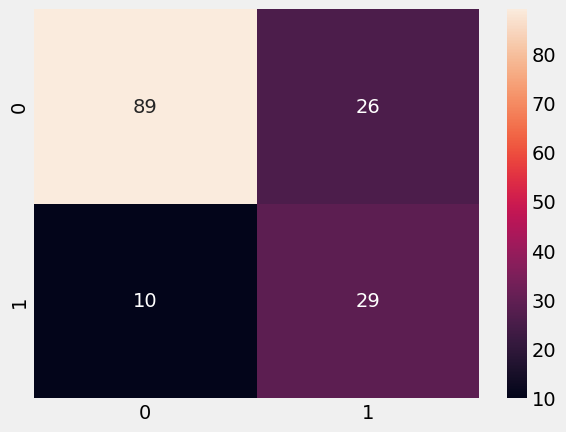

In [45]:
model3=RandomForestClassifier(class_weight='balanced')#الحلو في ده بيقدر يخلي الداتا بلنست لوحدها
cal(model3)

GradientBoostingClassifier(n_estimators=400)
accuracy is : 0.7857142857142857 recall is : 0.72 f1 is : 0.6857142857142857


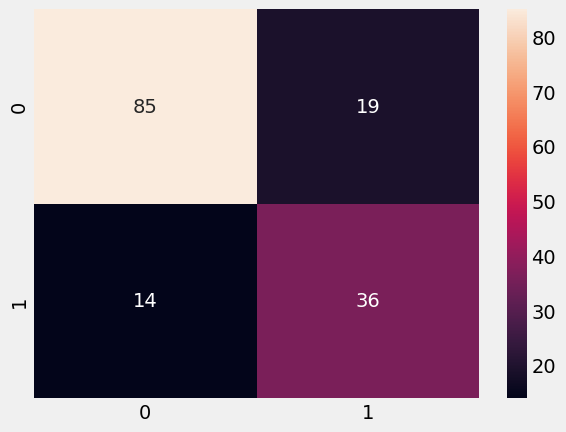

In [46]:
model4=GradientBoostingClassifier(n_estimators=400)
cal(model4)

In [ ]:
final_result=pd.DataFrame({"Algorisms":columns,'Accuracy':result1,'Recall':result2,'FScore':result3})

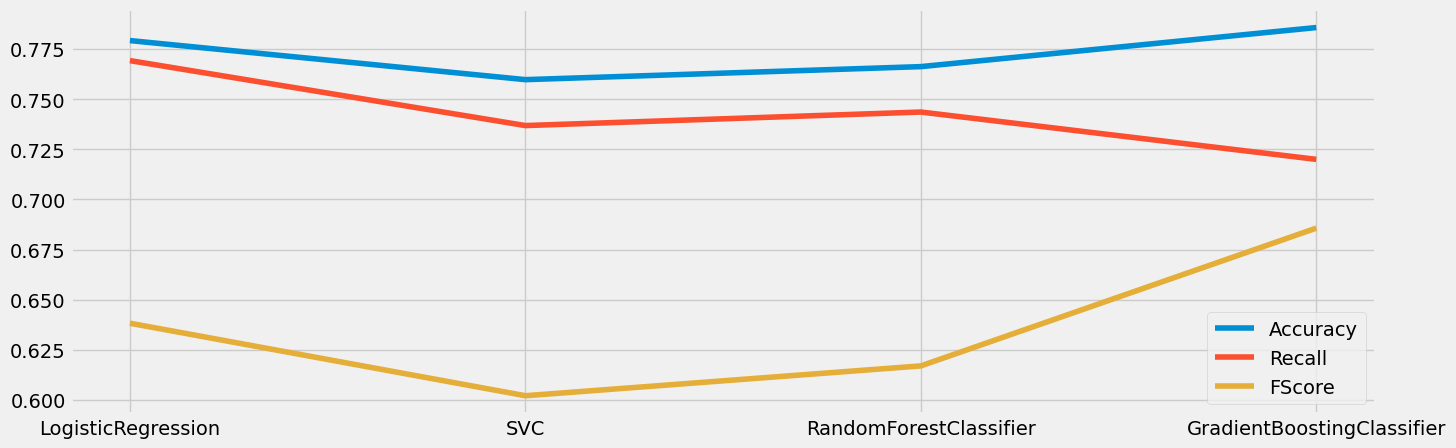

In [48]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(final_result.Algorisms,result1, label='Accuracy')
plt.plot(final_result.Algorisms,result2 , label='Recall')
plt.plot(final_result.Algorisms,result3 , label='FScore')
plt.legend()
plt.show()